In [1]:
pip install graph-tiger

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

from graph_tiger.cascading import Cascading
from graph_tiger.attacks import Attack
from graph_tiger.defenses import Defense
from graph_tiger.graphs import graph_loader
from graph_tiger.measures import run_measure

In [2]:
def plot_results(graph, params, results, xlabel='Steps', line_label='', experiment=''):
   plt.figure(figsize=(6.4, 4.8))

   title = ''
   for strength, result in results.items():
      result_norm = [r / len(graph) for r in result]
      plt.plot(result_norm, label="{}: {}".format(line_label, strength))

   plt.xlabel(xlabel)
   plt.ylabel(params['robust_measure'])
   plt.ylim(0, 1)

   save_dir = os.getcwd() + '/plots/' + experiment + '/'
   os.makedirs(save_dir, exist_ok=True)

   plt.legend()
   plt.title(title)
   plt.savefig(save_dir + title + '.pdf')
   plt.show()
   plt.clf()

Running simulation 7 times
Running simulation 7 times
Running simulation 7 times
Running simulation 7 times


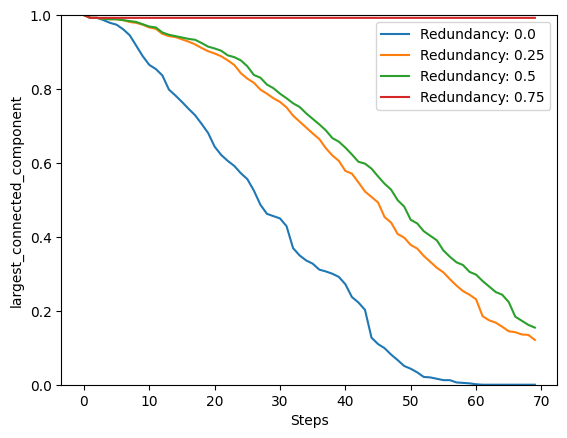

<Figure size 640x480 with 0 Axes>

In [3]:
graph = graph_loader(graph_type='ky2', seed=None)

params = {
     'runs': 7,
     'steps': 70,
     'seed': 1,

     'l': 0.8,
     'r': 0.2,
     'c': int(0.1 * len(graph)),

     'k_a': 5,
     'attack': 'rd_node',
     'attack_approx': None,  # int(0.1 * len(graph)),

     'k_d': 0,
     'defense': None,

     'robust_measure': 'largest_connected_component',

     'plot_transition': True,
     'gif_animation': False,

     'edge_style': 'bundled',
     'node_style': 'force_atlas',
     'fa_iter': 2000,

 }

results = defaultdict(list)

redundancy = np.arange(0, 1, .25)

for idx, r in enumerate(redundancy):
    params['r'] = r

    if idx == 0.25:
        params['plot_transition'] = True
        params['gif_animation'] = True
        params['gif_snaps'] = True
    else:
        params['plot_transition'] = False
        params['gif_animation'] = False
        params['gif_snaps'] = False

    cf = Cascading(graph, **params)
    results[r] = cf.run_simulation()

plot_results(graph, params, results, xlabel='Steps', line_label='Redundancy', experiment='Targeted Cascading Failure')

Running simulation 7 times
Running simulation 7 times
Running simulation 7 times
Running simulation 7 times


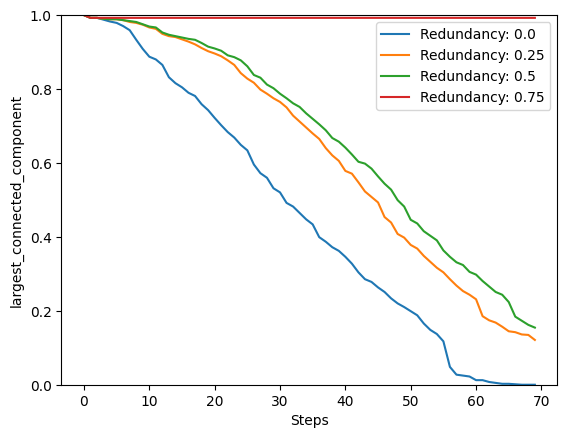

<Figure size 640x480 with 0 Axes>

In [15]:
graph = graph_loader(graph_type='ky2', seed=None)
params = {
      'runs': 7,
      'steps': 70,
      'seed': 1,
      'l': 0.8,
      'r': 0.2,
      'c': int(0.1 * len(graph)),
      'k_a': 5,
      'attack': 'rd_node',
      'attack_approx': None,  # int(0.1 * len(graph)),
    
      'k_d': 3,
      'defense': 'rd_node',
      'robust_measure': 'largest_connected_component',
      'plot_transition': False,
      'gif_animation': False,
      'edge_style': 'bundled',
      'node_style': 'force_atlas',
      'fa_iter': 2000,
  }
# node defense

results = defaultdict(list)

redundancy = np.arange(0, 1, .25)

for idx, r in enumerate(redundancy):
    params['r'] = r

    if idx == 0.25:
        params['plot_transition'] = True
        params['gif_animation'] = True
        params['gif_snaps'] = True
    else:
        params['plot_transition'] = False
        params['gif_animation'] = False
        params['gif_snaps'] = False

    cf = Cascading(graph, **params)
    results[r] = cf.run_simulation()

plot_results(graph, params, results, xlabel='Steps', line_label='Redundancy', experiment='redundancy')